Epoch 1/10
402/402 [==============================] - 159s 394ms/step - loss: 1.7913 - accuracy: 0.6597 - val_loss: 0.5737 - val_accuracy: 0.7115
Epoch 2/10
402/402 [==============================] - 157s 389ms/step - loss: 0.5247 - accuracy: 0.7481 - val_loss: 0.4927 - val_accuracy: 0.7660
Epoch 3/10
402/402 [==============================] - 148s 368ms/step - loss: 0.4881 - accuracy: 0.7733 - val_loss: 0.4647 - val_accuracy: 0.7848
Epoch 4/10
402/402 [==============================] - 155s 386ms/step - loss: 0.4573 - accuracy: 0.7892 - val_loss: 0.4450 - val_accuracy: 0.8046
Epoch 5/10
402/402 [==============================] - 157s 389ms/step - loss: 0.4300 - accuracy: 0.8052 - val_loss: 0.4126 - val_accuracy: 0.8113
Epoch 6/10
402/402 [==============================] - 157s 390ms/step - loss: 0.4089 - accuracy: 0.8135 - val_loss: 0.3926 - val_accuracy: 0.8264
Epoch 7/10
402/402 [==============================] - 163s 405ms/step - loss: 0.3870 - accuracy: 0.8267 - val_loss: 0.3828 -

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 80, 80, 32)        896       
                                                                 
 activation_14 (Activation)  (None, 80, 80, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 40, 40, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 activation_15 (Activation)  (None, 38, 38, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 19, 19, 64)       0         
 2D)                                                  

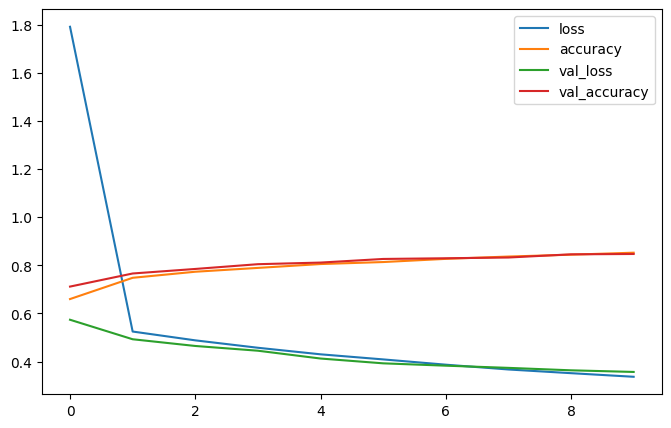

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
import time
import pandas as pd
from keras.optimizers import SGD


#loads stored X data for usage
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

#loads stored y data
pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

#trains the model through 6 layers - optimized do not change
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=X.shape[1:], padding= 'same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 

model.add(Dropout(0.4))
model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

opt = SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

#converts data to array to bypass error - do not touch
X = np.array(X)
y = np.array(y)

#model is fitted with optimized variables
model_history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

#model is saved for further usage
model.save('6xn-CNN.model')

#model shows all data for developer analysis
print(model.summary()) 
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.show()

In [20]:
import cv2

def prepare():
  img_array = cv2.imread('download10.jpg')
  new_array = cv2.resize(img_array, (80, 80))
  ary = new_array.reshape(-1, 80, 80, 3)
  return ary

prediction = model.predict(prepare())

if(prediction < 0.5):
  print('NSFW')
elif(prediction > 0.5):
  print('Normal')

1/1 [==============================] - 0s 33ms/step
NSFW
